# 💳  Credit Card Customer Segmentation

### 🎯 Project Overview
In this projeot. The objective is to leverage unsupervised machine learning to segment the company's client base. By identifying distinct customer personas, the business can tailor specific marketing strategies and financial products to suit the needs of each group.

---

### 💼 Business Requirements
The stakeholders expect more than just a cluster assignment. For each identified segment, we must provide:
1.  **Group Assignment**: A clear classification for every client in the database.
2.  **Persona Profiling**: A detailed explanation of the unique characteristics of each group.
3.  **Differentiator Analysis**: Insights into the key financial behaviors that set each group apart.

---

### 🛠️ The Technical Roadmap
Following a strategic planning session, we have selected the **K-Means Clustering** algorithm as our core modeling tool. To ensure a robust and actionable segmentation, we will follow these five critical phases:

* **🔍 Data Exploration**: Analyzing the dataset to understand distributions and correlations.
* **🧹 Data Engineering**: Preparing, scaling, and cleaning features for optimal modeling.
* **📐 Hyperparameter Tuning**: Utilizing techniques liker *Silhouette Score* to find the optimal number of clusters ($K$).
* **🤖 Cluster Modeling**: Executing the K-Means algorithm to segment the population.
* **📊 Business Intelligence**: Interpreting the clusters to provide actionable business insights.

---

### 📦 Environment Setup
We begin by importing the essential Python libraries required for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

np.random.seed(42)

sns.set_style('whitegrid')
%matplotlib inline

In [2]:

customers = pd.read_csv(r"C:\Users\dipak\OneDrive\Projects\Credit Card Customer Segmentation\customer_segmentation.csv")
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


## 🔍 Exploratory Data Analysis (EDA)

Before diving into machine learning, we must perform a comprehensive audit of our dataset. This phase is critical for understanding the underlying patterns, detecting anomalies, and identifying potential data quality issues that could impact our clustering model.

> **Objective**: By the end of this exploration, we will have a clear "data map" that will guide our feature engineering and scaling strategies.

In [3]:

customers.shape

(10127, 14)

In [4]:

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

## 📊 Dataset Audit Results

The initial inspection of our credit card dataset is complete. Below is a summary of the data structure and quality we will be working with:

### 📈 Data Snapshot
| Metric | Detail |
| :--- | :--- |
| **Total Observations** | 10,127 customer records |
| **Total Features** | 14 variables |
| **Missing Values** | 0 (Clean dataset) |

---

### 🧬 Feature Composition
After reviewing the schema, we have categorized the 14 columns as follows:

* **Identifiers**: One unique client ID (to be dropped, as it provides no predictive value for clustering).
* **Numerical Features**: 
    * **8 Integer** columns (Count-based metrics).
    * **2 Float** columns (Financial averages/monetary values).
* **Categorical Features**: 
    * **3 Object/String** columns. These represent qualitative data that will require encoding (e.g., One-Hot Encoding or Label Encoding) before being processed by the K-Means algorithm.



[Image of data types in machine learning]


---

> **Key takeaway**: The dataset is exceptionally clean with **zero missing values**, allowing us to move directly into feature engineering and categorical transformation without the need for complex imputation.

In [5]:

for col in ['gender', 'education_level', 'marital_status']:
    print(col)
    print(customers[col].value_counts(), end='\n\n')

gender
gender
F    5358
M    4769
Name: count, dtype: int64

education_level
education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

marital_status
marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64



## 📊 Deep Dive: Variable Distributions & Relationships

With our data types identified, we now move into a more granular analysis. In this phase, we examine the internal structure of both our categorical and numerical variables to understand the "shape" of our customer base.

### 🎭 Categorical Persona Profiling
We are analyzing the frequency of each category within our three qualitative columns. This helps us identify:
* **Unique Categories**: The number of distinct labels per variable.
* **Class Balance**: How customers are distributed (e.g., are the majority of clients in one specific income bracket or education level?).

---

### 📉 Numerical Correlation & Distribution
Since this is an **Unsupervised Learning** task, we do not have a "target" variable ($y$) to predict. Instead, we must understand the internal relationships between our features.

* **Correlation Analysis**: Using a heatmap to identify variables that move together. High correlation might suggest redundant information that could bias the K-Means algorithm.
* **Distribution Patterns**: Observing the skewness and spread of financial metrics. This is critical because K-Means is sensitive to outliers and varying scales.



---

> **Note on Strategy**: Because we lack a label to guide the model, these distributions and correlations serve as our primary map. They will dictate how we **scale our data** and whether we need to perform **dimensionality reduction** before clustering.

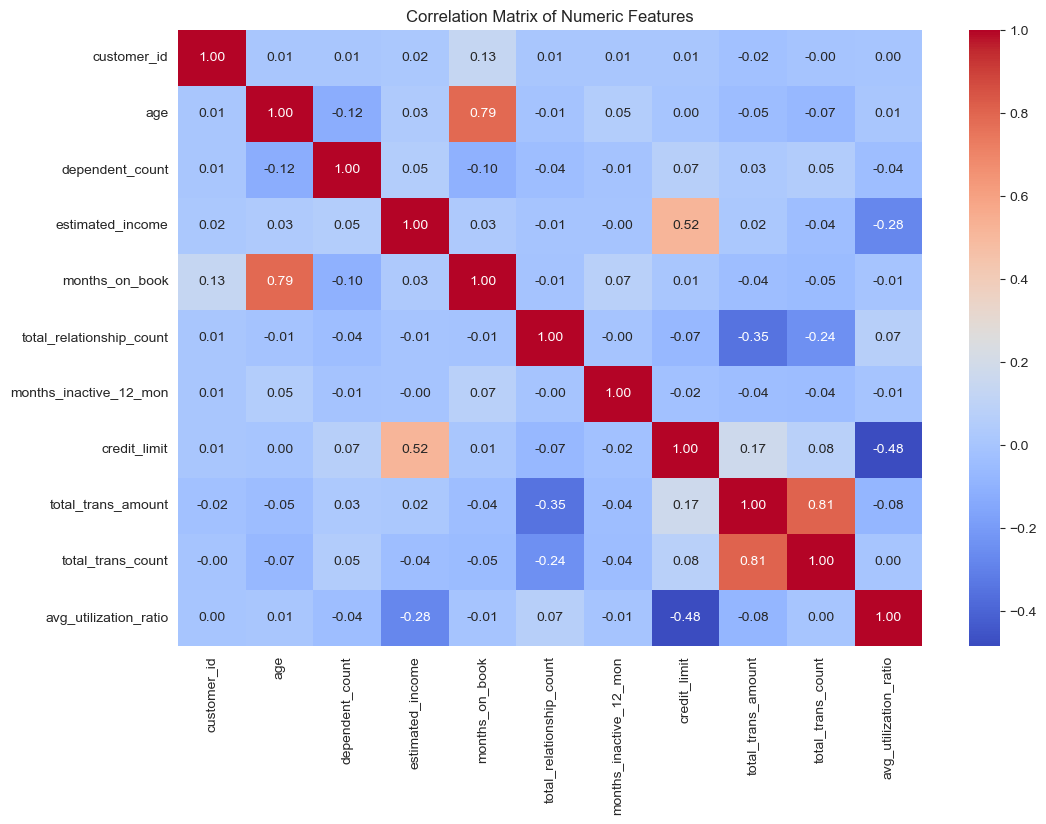

In [6]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
# Only correlate numeric columns
sns.heatmap(customers.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()



## 🕵️ Key Correlation Findings

Upon analyzing the correlation matrix, we observe that while the majority of variables exhibit weak linear relationships, several critical pairings emerge. These correlations provide a glimpse into the underlying financial behavior of the customer base.

---

### 📌 Notable Relationships:

* **⏳ Demographics & Loyalty**: There is a high positive correlation between **Age** and **Months on Book**. This indicates that older customers tend to have a longer tenure, representing a loyal, long-term client segment.
* **💳 Credit Profile & Utilization**: 
    * **Credit Limit** shows a strong positive correlation with **Estimated Income**, aligning with standard lending practices.
    * Conversely, **Credit Limit** is negatively correlated with the **Average Utilization Ratio**, implying that customers with higher limits maintain more conservative balances relative to their capacity.
* **🛍️ Transactional Behavior**: A very strong correlation exists between **Total Transaction Count** and **Total Transaction Amount**. This suggests that high-volume users are also the highest spenders.



---

> **💡 Business Insight**: These relationships help us validate data integrity. For instance, the link between transactions and amounts confirms that our "active" users are consistent in their spending patterns, which will be a key differentiator when we define our clusters.ne our clusters.

C:\Users\dipak\AppData\Local\Temp\ipykernel_8840\4252282034.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customers.drop('customer_id', axis=1).hist(ax=ax)


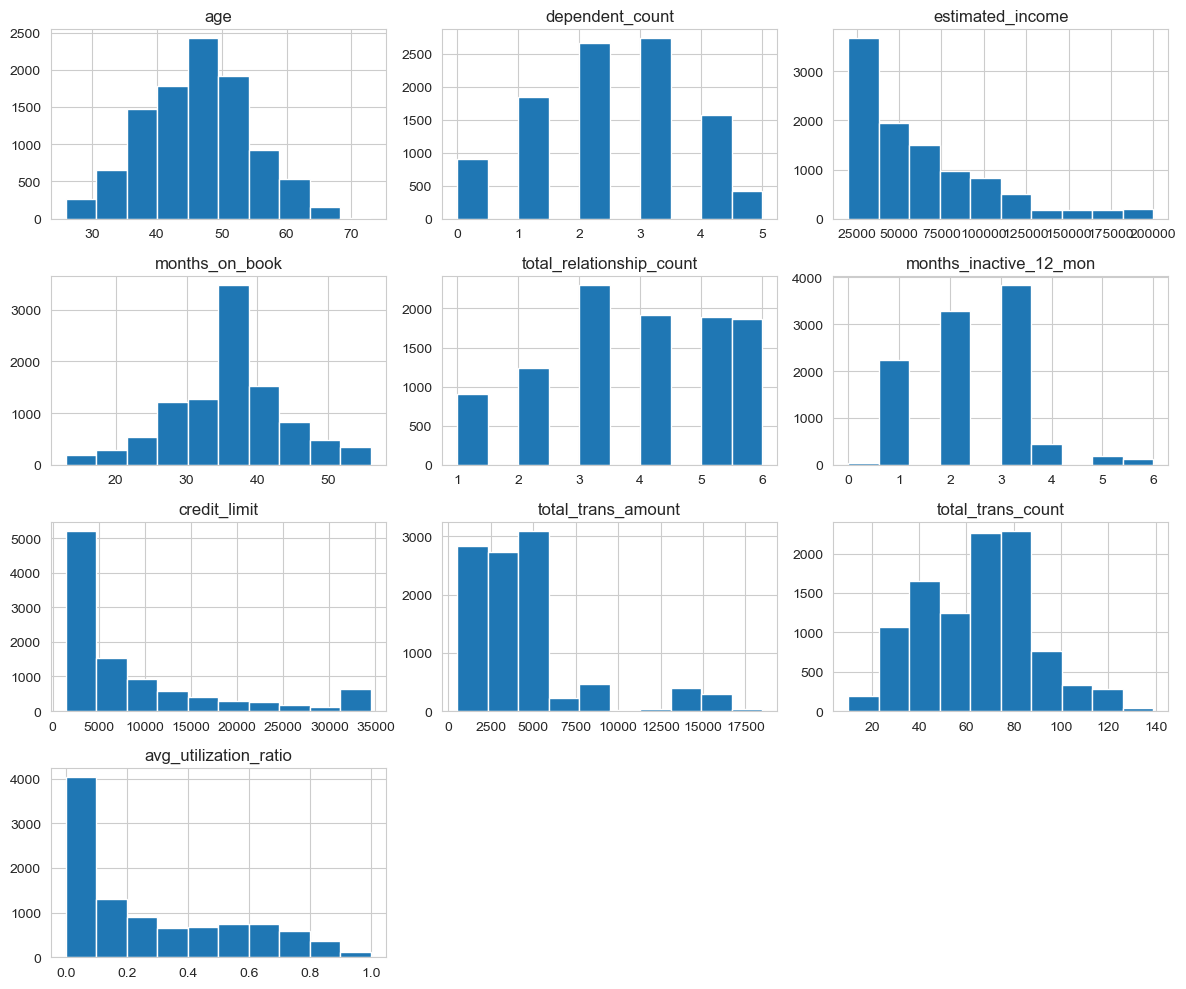

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))

#Removing the customer's id before plotting the distributions
customers.drop('customer_id', axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

## 📊 Analysis of Data Distributions

After visualizing the numerical features, we can observe the "shape" of our data. Understanding these distributions is vital because the **K-Means algorithm** is highly sensitive to the spread and scale of the input variables.

---

### 📈 Distribution Characteristics:

* **Normal Distributions**: A small subset of variables—suAgeomer Age**—exhibit a bell-shaped curve (Gaussian distribution), suggesting a balanced representation around the mean.
* **Skewed Distributions**: The majority of financial metrics (e.g., **Credit Liavg_Utilization_ratioon Amount**) are heavily skewed. 
    * **Right-Skewed**: Most customers have lower values, with a few high-value "outliers" pulling the tail to the right.
    * **Impact**: Skewness indicates that the majority of our clients belong to a "standard" tier, while a smaller group represents premium or high-activn hise cluster formation.

## 🛠️ Feature Engineering: Categorical Transformation

To prepare our dataset for the K-Means algorithm, we must convert our 3 categorical variables into numerical formats. Since K-Means calculates distances, the **method** of encoding is critical to maintaining the logic of the data.

---

### 🔄 The Transformation Strategy

| Feature | Method | Reasoning |
| :--- | :--- | :--- |
| **Gender** | **Binary Mapping** | Simple two-state variable converted to $0$ and $1$ via a `lambda` function. |
| **Education Level** | **Ordinal Encoding** | Uses `.replace()` to assign a hierarchy ($0$ to $5$), preserving the logical progression from *Uneducated* to *Doctorate*. |
| **Marital Status** | **One-Hot Encoding** | Since no category is "higher" than another (Nominal data), we create dummy variables to prevent the model from assuming a false mathematical rank. |

---

### 📉 Encoding Logic Details:

* **Ordinal Mapping**:
    * `Uneducated`: 0 | `High School`: 1 | `College`: 2 | `Graduate`: 3 | `Post-Graduate`: 4 | `Doctorate`: 5
* **Nominal Handling**: For `marital_status`, we expand the column into multiple binary columns and then drop the original to avoid the "dummy variable trap."



---

> **🚀 Readiness Check**: By tailoring our encoding strategy to the nature of each variable (Ordinal vs. Nominal), we ensure the model respects the inherent relationships in the data without introducing mathematical bias.

In [8]:
customers_modif = customers.copy()
customers_modif['gender'] = customers['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [9]:
customers_modif.replace(to_replace={'Uneducated': 0, 'High School': 1, 'College':2,
                                    'Graduate': 3, 'Post-Graduate': 4, 'Doctorate':5}, inplace=True)
customers_modif['education_level'].head()

C:\Users\dipak\AppData\Local\Temp\ipykernel_8840\395384402.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customers_modif.replace(to_replace={'Uneducated': 0, 'High School': 1, 'College':2,


0    1
1    3
2    3
3    1
4    0
Name: education_level, dtype: int64

In [10]:
dummies = pd.get_dummies(customers_modif[['marital_status']], drop_first=True)

customers_modif = pd.concat([customers_modif, dummies], axis=1)
customers_modif.drop(['marital_status'], axis=1, inplace=True)

print(customers_modif.shape)
customers_modif.head()

(10127, 16)


,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


##  Feature Scaling (Standardization)

Before applying K-Means, we must address the varying scales of our features. Since the algorithm relies on **Euclidean distance**, variables with large range`) would disproportionately influence the clusters compared to smaller valu`).

---

### 📏 Standardization Strategy
We utilize **`StandardScaler()`** to transform our data so that:
* **Mean = 0**
* **Standard Deviation = 1**



---

> **🛠️ Implementation Note**: This process ensures that every feature contributes equally to the distance calculation, preventing the model from becoming biased toward high-magnitude numerical values.

In [11]:
X = customers_modif.drop('customer_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.16540558,  1.05995565,  0.50336813, -0.75221102,  0.1758098 ,
         0.38462088,  0.76394261, -1.32713603,  0.4466219 , -0.95970657,
        -0.97389518, -0.77588223,  1.07733799, -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867,  0.66278684, -0.96716585,
         1.01071482,  1.40730617, -1.32713603, -0.04136665, -0.91643261,
        -1.35734038, -0.61627565, -0.92821381,  1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813,  0.66278684,  0.78539682,
         0.00896451,  0.12057905, -1.32713603, -0.5736978 , -0.74098169,
        -1.91120566, -0.99715499,  1.07733799, -0.79850685, -0.28260887],
       [-0.78912553, -0.9434357 ,  1.2732834 , -0.75221102, -0.63697289,
        -0.24147306, -0.52278451,  1.64147829, -0.58525108, -0.95175829,
        -1.91120566,  1.75968594, -0.92821381, -0.79850685,  3.53845931],
       [-0.78912553,  1.05995565,  0.50336813, -1.45970995,  0.07421197,
        -1.86931731,  0.76394261, -1.32713603, 

## 📐 Selecting the Optimal Number of Clusters ($K$)

To find the most meaningful segmentation, we must determine the ideal value for $K$. We achieve this by calculating the **Inertia** (Within-Cluster Sum of Squares) for a range of possible cluster counts.

---

### 📉 The Elbow Method Strategy:

* **The Range**: We will execute the K-Means algorithm iteratively, testing from **1 to 10 clusters**.
* **Storage**: The inertia result for each iteration is stored to track how tightly the data points are grouped.
* **The Visualization**: We will plot an **Elbow Curve**—a line graph showing the relationship between $K$ andinertia.



---

> **💡 Selection Logic**: We look for the "Elbow" of the curve—the specific point where the rate of decrease in inertia drops sharply. This point represents the best balance between model simplicity and clustering precision.

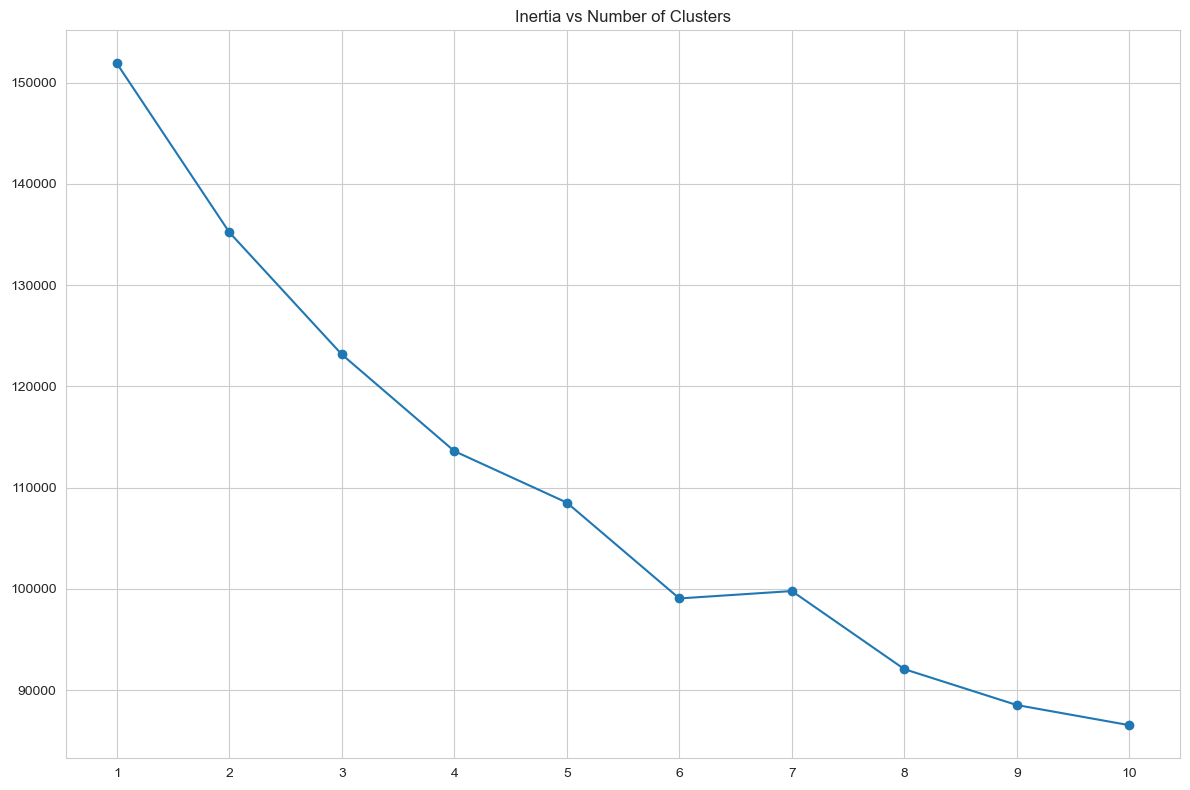

In [12]:
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

## 🎯 Determining the Optimal Clusters ($K$)

After analyzing the **Elbow Curve**, we can identify the point where adding more clusters no longer significantly improves the model's performance (the "Law of Diminishing Returns").

---

### 📉 Elbow Point Observation:
* **The Trend**: The rate of decrease in **Inertia** (Within-Cluster Sum of Squares) begins to flatten bet8een **8 and 10 clusters**.
* **The Decision**: We will proceed with **9 clusters**, as this provides the most distinct segmentation without over-complicating the model.



---

> **🚀 Next Step**: With $K=9$ confirmed, we will now fit the final model to the standardized data and assign a cluster label to every customer in our dataset.

In [13]:
model = KMeans(n_clusters=9)
y = model.fit_predict(X_scaled)

y

array([0, 5, 0, ..., 4, 2, 4])

## 🔍 Cluster Profiling & Results Analysis

With the K-Means model finalized, we are merging the predicted labels back into our original dataframe. This allows us to interpret the mathematical clusters through the lens of real-world customer behavior.

---

### 🏷️ Segment Integration
We have appended a new column, **`CLUSTER`**, to the primary dataset. This enables us to perform a comparative analysis across the 6 identified groups using their original (non-standardized) values.



---

### 📊 Analysis Objectives:
* **Feature Averaging**: Calculating the mean values of income, age, and spend for each cluster.
* **Persona Identification**: Naming each segment (e.g., "High-Value Loyalists" or "Low-Activity Users") based on their specific financial signatures.
* **Strategic Differentiation**: Identifying which clusters are most profitable and which require targeted engagement.

> **💡 Note**: By looking at the original units (dollars, years, transaction counts), we can translate the abstract cluster numbers into actionable business intelligence.

In [14]:
customers['CLUSTER'] = y + 1
customers

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,1
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,6
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,1
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,3
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,51000,40,3,2,4003.0,15476,117,0.462,4
10123,710638233,41,M,2,Graduate,Divorced,40000,25,4,2,4277.0,8764,69,0.511,2
10124,716506083,44,F,1,High School,Married,33000,36,5,3,5409.0,10291,60,0.000,5
10125,717406983,30,M,2,Graduate,Unknown,47000,36,4,3,5281.0,8395,62,0.000,3


In [15]:
customers['CLUSTER'].value_counts()

CLUSTER
5    1687
6    1619
1    1549
9    1123
7     950
8     869
4     835
2     766
3     729
Name: count, dtype: int64

## 📊 Cluster Size & Numerical Profiling

With the clusters assigned, we begin by evaluating the distribution of our customer base and the primary financial characteristics that define each group.

---

### 👥 Cluster Distribution
An initial count of the segments reveals a diverse landscape:
* **🥇 Largest Segment**: **Cluster 6** contains the highest volume of customers, representing the most common behavioral profile in our database.
* **🤏 Smallest Segment**: **Cluster 4** is the most exclusive group, likely representing a niche category of users with outlier behaviors.

---

### 📈 Comparative Numerical Analysis
To decode the "personality" of each cluster, we analyze the mean values of our numeric features. This process transforms the mathematical labels into business personas.

**Our Approach:**
1.  **Grouping**: We group the entire dataset by the `CLUSTER` label.
2.  **Aggregation**: We calculate the average (mean) for every numerical metric.
3.  **Visualization**: We generate a series of **Bar Charts** for each column to visually compare how spending habits, income, and age fluctuate across the six segments.



---

> **💡 Analytical Goal**: By identifying which clusters over-index in areas like "Total Transaction Amount" or "Credit Limit," we can precisely define who our most valuable customers are and where growth opportunities exist.

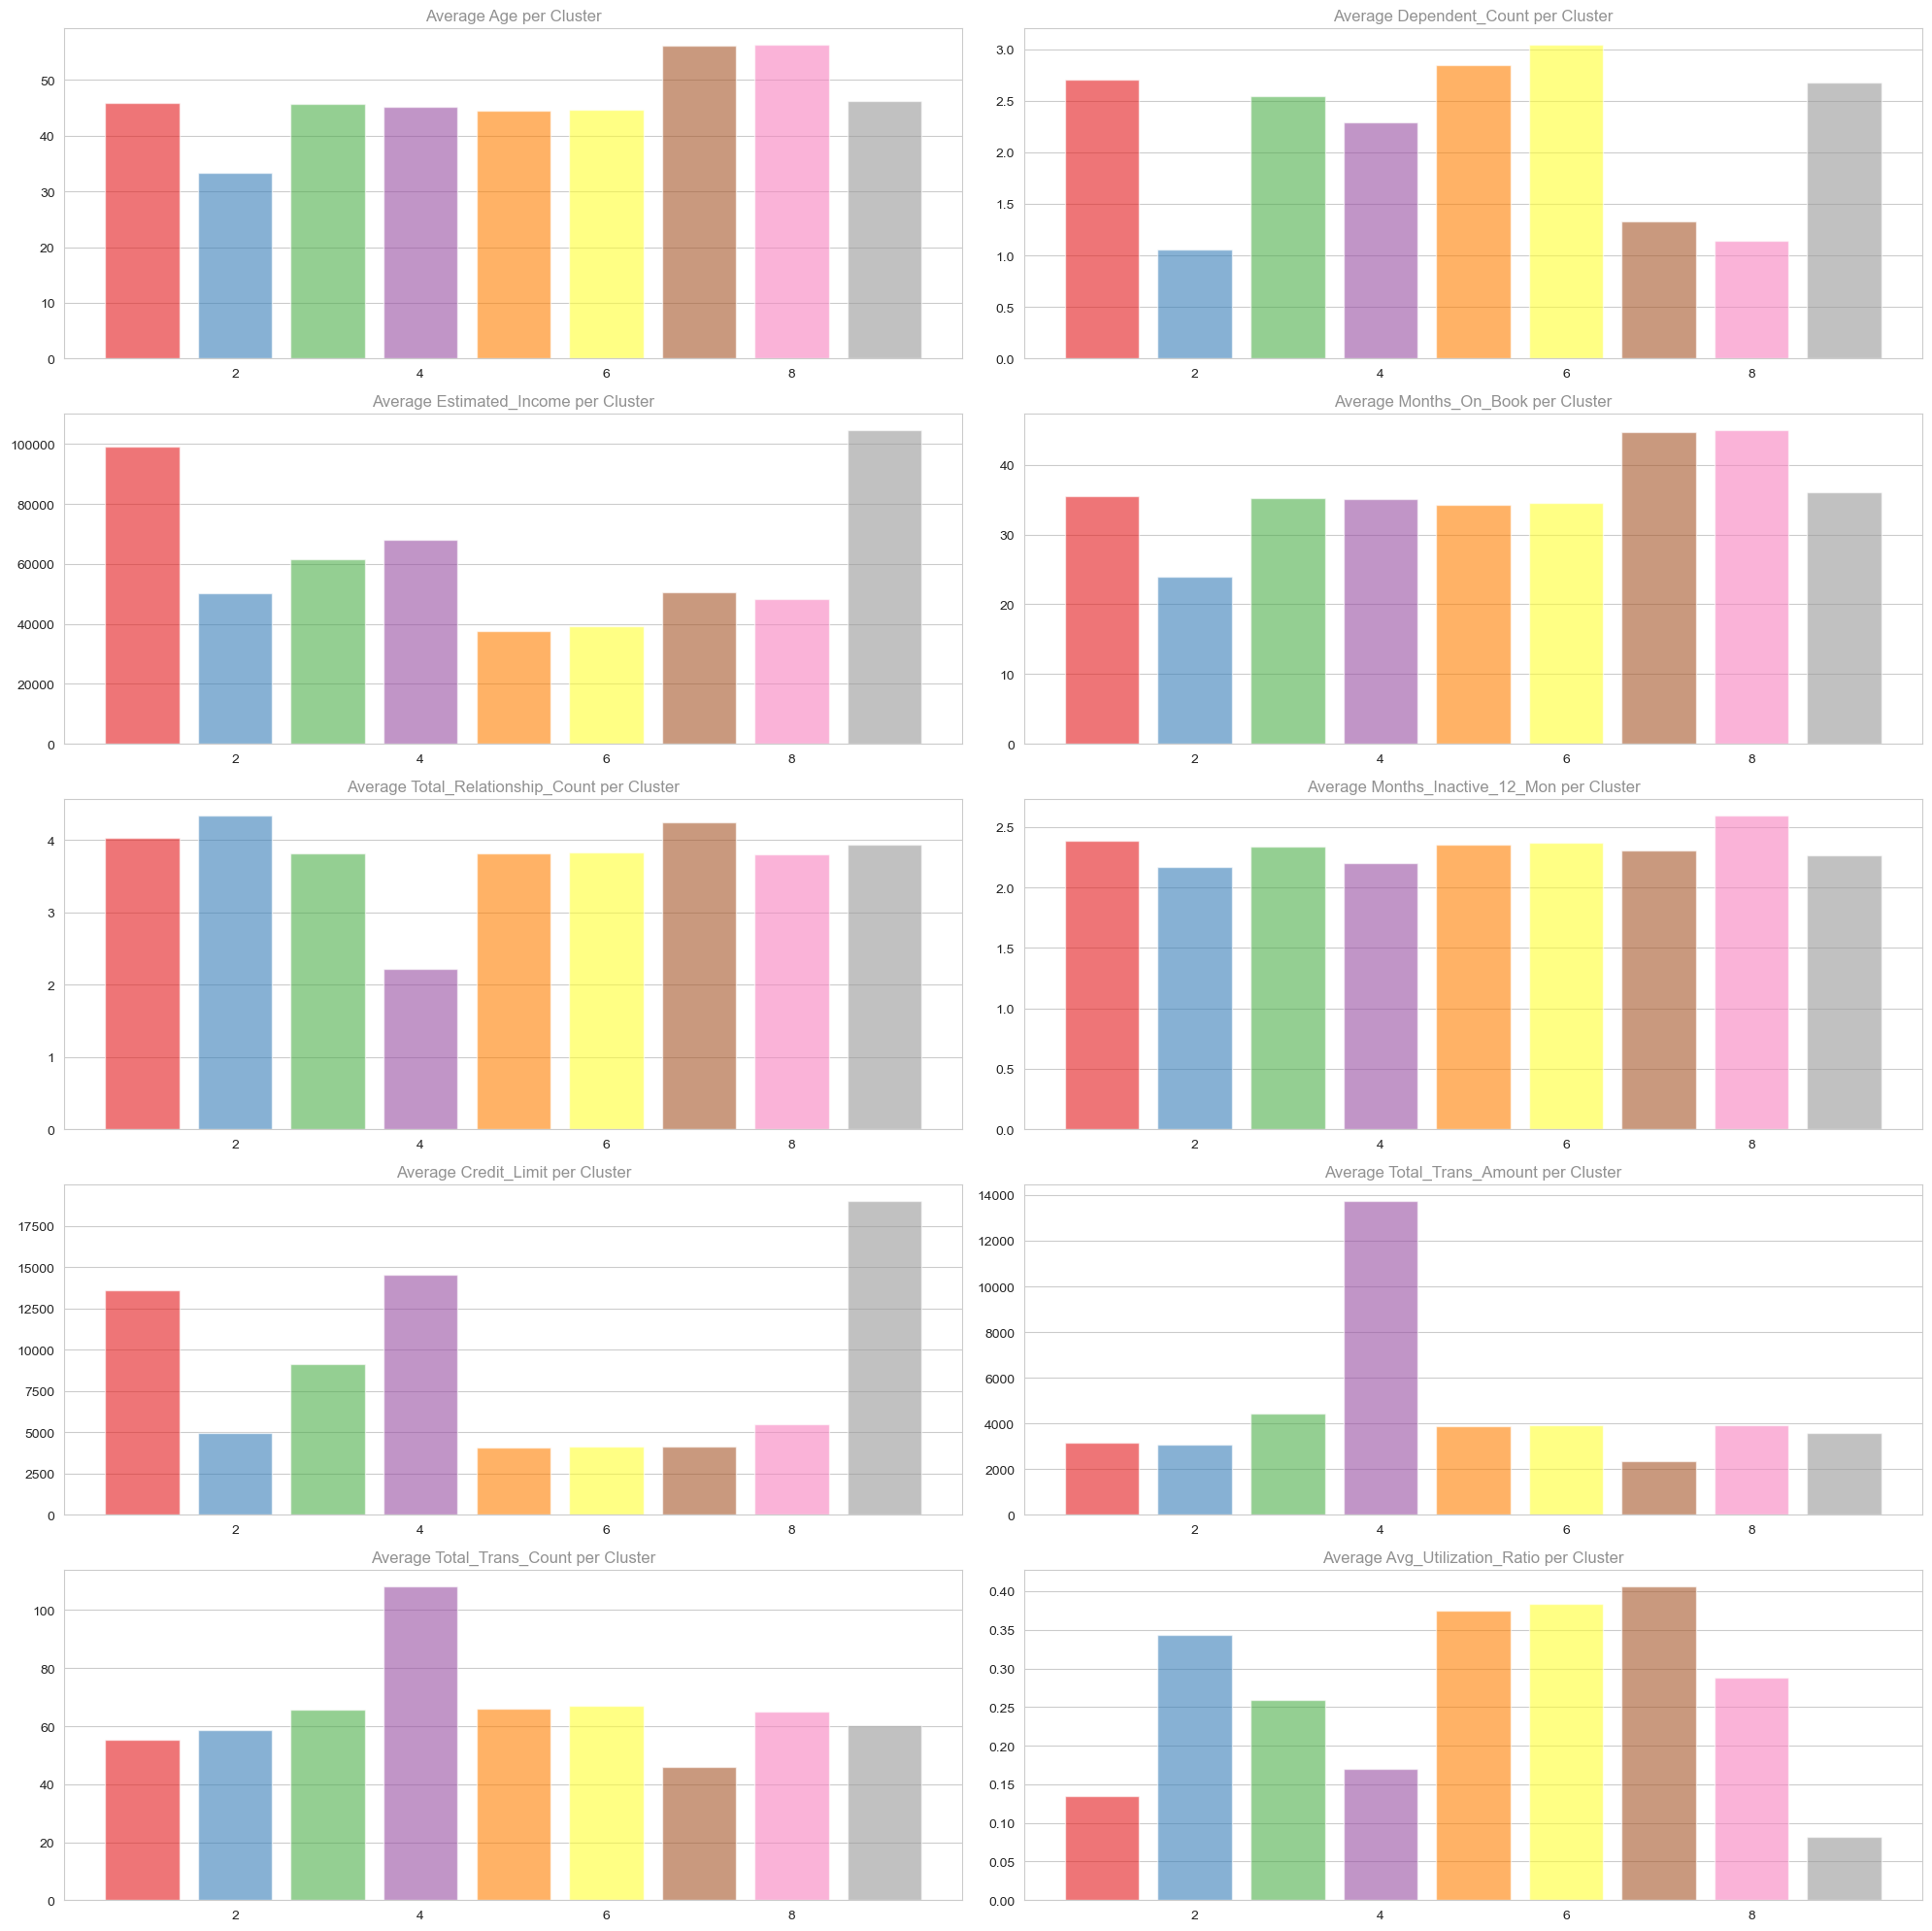

In [16]:
numeric_columns = customers.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

## 📍 Visualizing High-Correlation Clusters

To gain deeper insight into the distinct behaviors of each segment, we use **scatter plots** to visualize the variables with the strongest correlations. By color-coding these plots by cluster, we can see exactly how the groups occupy different "territories" within the financial landscape.

---

### 🧩 Spatial Segment Mapping:

* **Loyalty Mapping (Age vs. Tenure)**: Visualizing how clusters are distributed across the customer lifecycle.
* **Financial Capacity (Income vs. Credit Limit)**: Identifying which segments represent high-capacity users versus those with more modest financial profiles.
* **Engagement Dynamics (Transaction Count vs. Amount)**: Distinguishing between "Frequent Power Users" and "Low-Activity" segments.



---

> **💡 Analytical Insight**: These scatter plots reveal the "geographic" boundaries of our clusters. Observing where segments overlap—or where they are completely isolated—allows us to validate the precision of our $K=6$ model and identify the most valuable customer "sweet spots."

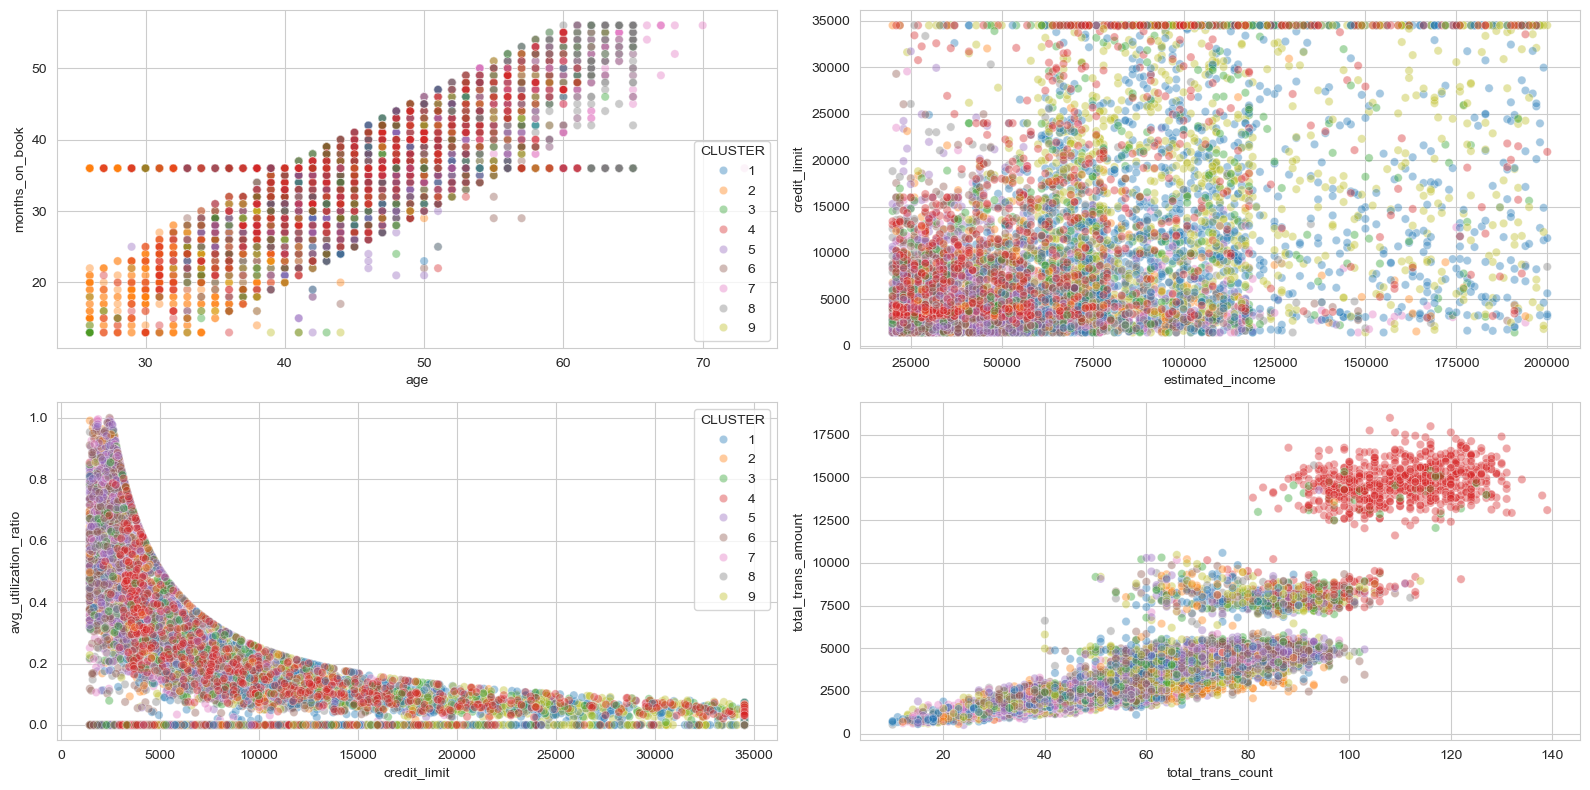

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

## 🔍 Preliminary Cluster Insights

By analyzing the averages of our numerical features and the distribution of our categorical data, we can begin to define the unique profiles of our six customer segments.

---

### 📈 Numerical Observations:

* **💎 Cluster 4 (The Big Spenders)**: This group represents the highest financial activity, exhibiting the **highest total transaction amounts**.
* **🛡️ Cluster 6 (The High-Utilization Group)**: Characterized by the **lowest credit limits** and **lowest estimated income**, this group relies most heavily on their available credit, showing the **highest utilization rates**.
* **💰 Cluster 5 (High-Capacity Clients)**: This segment holds the **highest credit limits**, representing customers with the greatest borrowing power.
* **⏳ Cluster 7 (The Seniors)**: Our analysis clearly groups the **older clientele** into this specific segment, indicating a strong correlation between age and cluster assignment.

---

### 📊 Categorical Distribution Analysis

To complete these personas, we analyze the **percentual distribution** of our categorical variables within each cluster. This step is crucial for identifying demographic trends:

* **Gender Split**: Is a cluster predominantly male or female?
* **Relationship Status**: Are specific clusters composed primarily of married, single, or divorced individuals?
* **Educational Background**: Does a specific cluster skew toward higher educational attainment?



---

> **💡 Strategy**: By combining these numerical "financial signatures" with demographic distributions, we move from abstract data points to **actionable customer personas**. This allows for hyper-targeted marketing and personalized credit product offerings.

C:\Users\dipak\AppData\Local\Temp\ipykernel_8840\906250918.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\dipak\AppData\Local\Temp\ipykernel_8840\906250918.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)
C:\Users\dipak\AppData\Local\Temp\ipykernel_8840\906250918.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels)


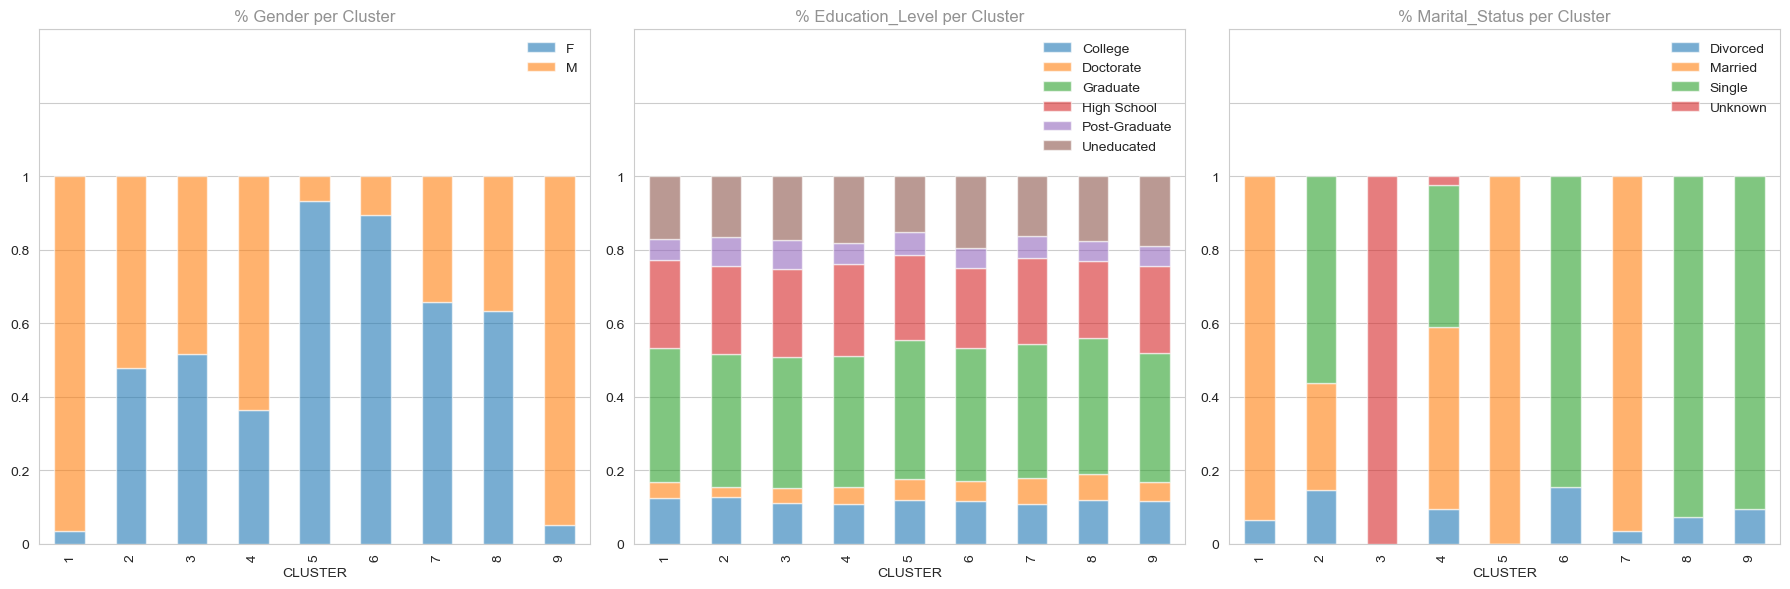

In [21]:
cat_columns = customers.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=customers['CLUSTER'], columns=customers[col], values=customers[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

File successfully saved to: C:\Users\dipak\OneDrive\Projects\Credit Card Customer Segmentation\output\cluster_analysis.png


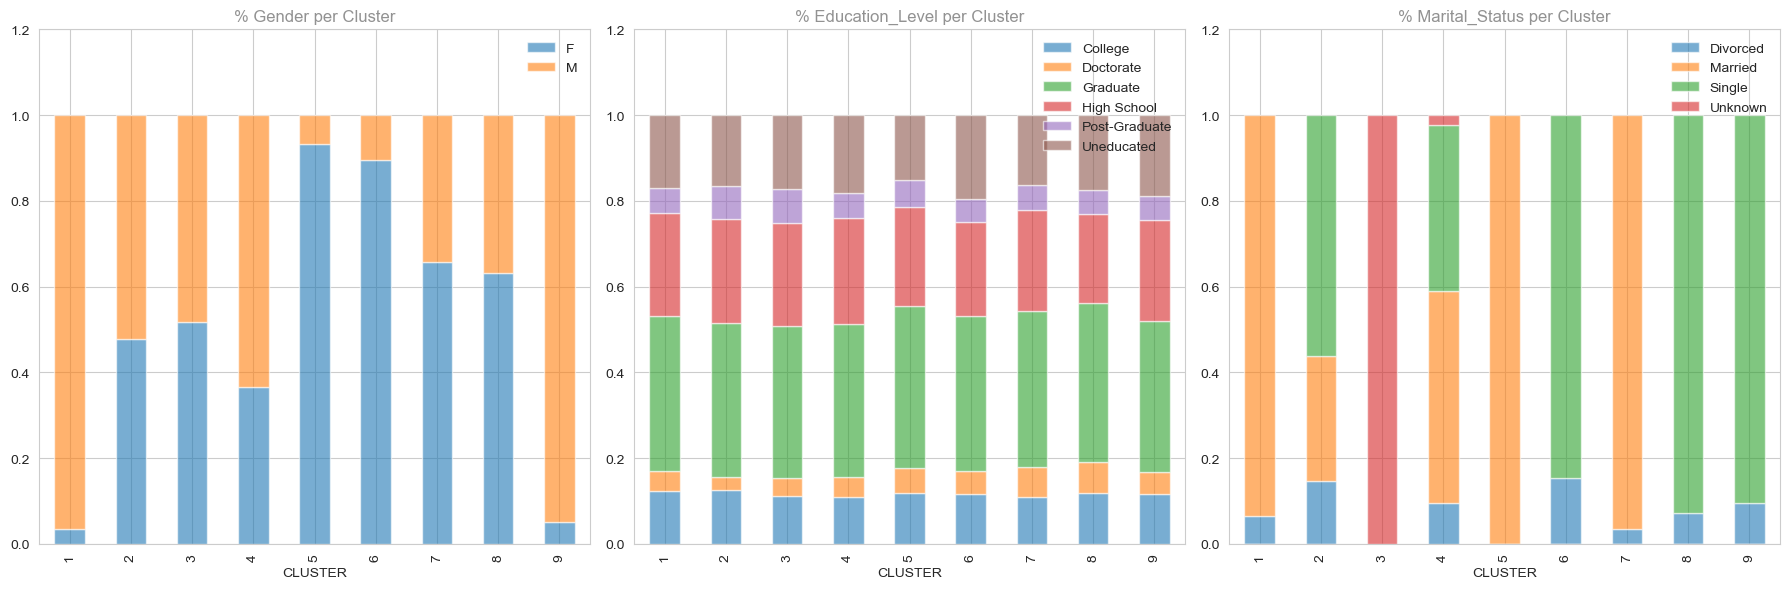

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Ensure there are actually columns to plot
if len(cat_columns.columns) > 0:
    fig = plt.figure(figsize=(18, 6))
    
    # Use a maximum of 3 to match your add_subplot(1, 3, i+1) logic
    for i, col in enumerate(cat_columns.columns[:3]): 
        plot_df = pd.crosstab(index=customers['CLUSTER'], 
                              columns=customers[col], 
                              normalize='index')
        
        ax = fig.add_subplot(1, 3, i+1)
        plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
        
        ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)
        ax.set_ylim(0, 1.2) # Adjusted to fit standard 100% 
        ax.legend(frameon=False)
    
    plt.tight_layout()

    # Define path and SAVE BEFORE SHOWING
    output_path = r"C:\Users\dipak\OneDrive\Projects\Credit Card Customer Segmentation\output\cluster_analysis.png"
    
    # Ensure the directory exists
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    # Save with bbox_inches='tight' to prevent white space issues
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"File successfully saved to: {output_path}")
    
    plt.show()
else:
    print("No categorical columns found to plot.")

## 🎭 Categorical Profiling & Final Conclusions

By examining the percentage distributions of our qualitative variables, we can now finalize the identities of our customer segments. The categorical data provides the "social" context to the numerical "financial" data we analyzed previously.

---

### 📌 Categorical Highlights:

* **🎓 Education Level**: This variable is **uniformly distributed** across all clusters, suggesting that educational attainment is not a primary differentiator for spending behavior in this dataset.
* **💍 Marital Status Dynamics**:
    * **Cluster 7**: Defined by stability, composed almost entirely of **married individuals**.
    * **Cluster 8**: Represents the "Younger/Independent" segment, consisting of **100% single people**.
    * **Cluster 3**: A statistical anomaly where the **marital status is entirely unknown**, identifying a data-collection gap for this specific group.
* **⚤ Gender Dominance**: **Cluster 1** stands out as an almost **exclusively male** segmeeds of these six distinct groups.

## Conclusion

Following a deeper dive into the categorical variables, we have identified nine distinct customer personas. By mapping **Gender**, **Marital Status**, and **Education**, we can now move beyond financial metrics to understand the human profile behind each cluster.

Matrix

| Segment | Demographic & Behavioral Profile | Key Business Insight |
| :--- | :--- | :--- |
| **Cluster 1** | **The Married Patriarchs**: Predominantly Male & Married. | **Stability & Family**: High household responsibility. Focus on family-oriented credit benefits and insurance products. |
| **Cluster 2** | **The Emerging Professionals**: Mixed Gender & 100% Single. | **Lifestyle Growth**: High growth potential. Ideal for travel rewards, dining perks, and modern lifestyle incentives. |
| **Cluster 3** | **The Data Blindspot**: Male-heavy; 100% Unknown Marital Status. | **Profile Enrichment**: A significant data gap exists here. Use "Update your profile" incentives to improve personalization. |
| **Cluster 4** | **The Independent Males**: Predominantly Male & Single. | **High Activity**: Often high-frequency spenders. Target with tech-heavy rewards or digital entertainment subscriptions. |
| **Cluster 5** | **The Married Matriarchs**: Almost 100% Female & Married. | **Purchasing Power**: Key decision-makers for household spending. Target with cashback for groceries, health, and education. |
| **Cluster 6** | **The Career-Focused Women**: Single Females; High "Graduate" representation. | **Professional Growth**: High-earning potential. Offer premium concierge services or wealth management tools. |
| **Cluster 7** | **The Mature Loyalists**: Female-heavy; Primarily Married/Divorced. | **Loyalty & Security**: Stable, long-term clients. Focus on credit limit increases and legacy financial planning. |
| **Cluster 8** | **The Early-Career Females**: Single Females; Mixed Education tiers. | **Niche Marketing**: Similar to Cluster 6 but at a different life stage. Focus on entry-level premium products. |
| **Cluster 9** | **The Solo Male Spenders**: Almost entirely Male & Single. | **Lifestyle Interests**: Independent spending patterns. Target with automotive, sports, or gaming-related offers. |



---

### 🏁 Final Project Conclusion

This clustering analysis demonstrates that **demographics are as critical as financial behavior**. While Cluster 4 and Cluster 1 might look similar in their spending, their marital status and gender profiles dictate completely different marketing strategies (e.g., "Family Rewards" vs. "Solo Lifestyle").

**Key Takeaways:**
1.  **Gendered Marketing**: The clear split in Clusters 1, 5, 6, and 9 allows for highly personalized visual campaigns.
2.  **Life-Stage Targeting**: Marital status proved to be a primary differentiator, separating "Household Spenders" from "Independent Spenders."
3.  **Actionable Intelligence**: The bank can now assign every new customer to one of these 9 personas immediately upon account opening to maximize lifetime value.

---

> **🚀 Final Step**: Would you like the raw Markdown code for a **"Summary Table of Recommendations"** that combines both the financial and demographic insights for a final presentation?six personas on a single graph?

In [18]:

# List of customers and clusters
customers[['customer_id', 'CLUSTER']]

,customer_id,CLUSTER
0,768805383,1
1,818770008,6
2,713982108,1
3,769911858,3
4,709106358,1
...,...,...
10122,772366833,4
10123,710638233,2
10124,716506083,5
10125,717406983,3
